# Linear Regression using Real Life Data (Practical Example)

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Load the Data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

### Exploring the descriptive statistics of the variable

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variable of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Removing Missing Value

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_noMv = data.dropna(axis=0)
data_noMv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Exploring Probability Distribution Function

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

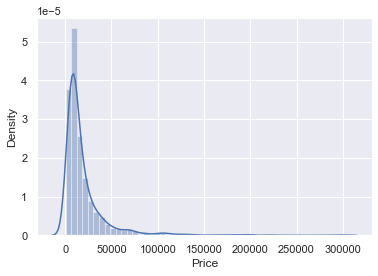

In [7]:
sns.distplot(data_noMv['Price'])

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

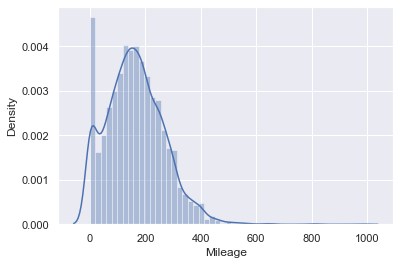

In [8]:
sns.distplot(data_noMv['Mileage'])

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

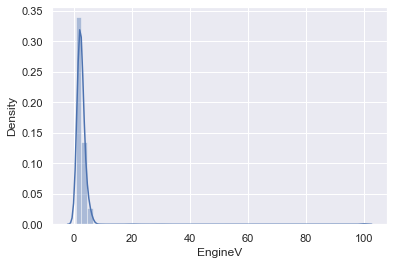

In [9]:
sns.distplot(data_noMv['EngineV'])

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

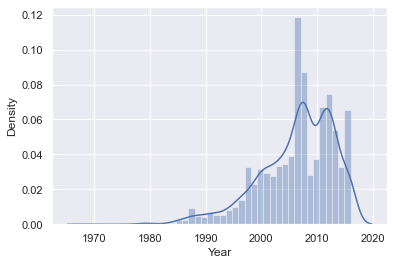

In [10]:
sns.distplot(data_noMv['Year'])

### Dealing with outliers

In [11]:
outliers = data_noMv['Price'].quantile(0.99)
data1 = data_noMv[data_noMv['Price']<outliers]
data1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


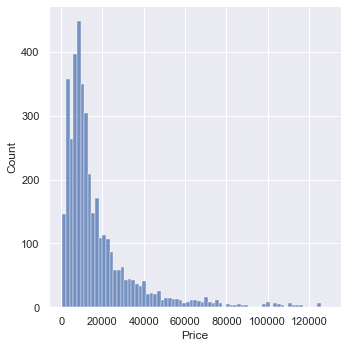

In [12]:
sns.displot(data1['Price'])

In [13]:
outliers = data1['Mileage'].quantile(0.99)
data2 = data_noMv[data_noMv['Mileage']<outliers]

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

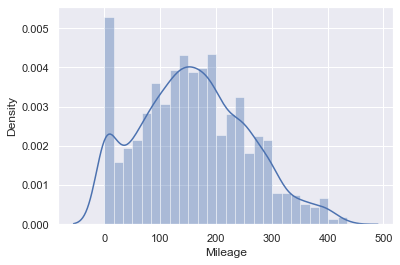

In [14]:
sns.distplot(data2['Mileage'])

In [15]:
data3 = data2[data2['EngineV']<6.5]

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

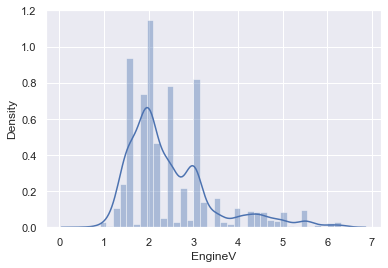

In [16]:
sns.distplot(data3['EngineV'])

In [17]:
outliers = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>outliers]

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

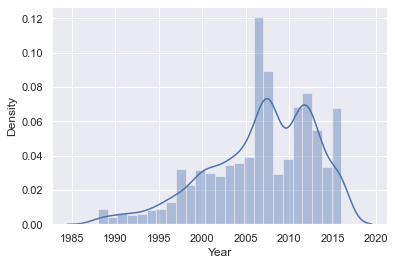

In [18]:
sns.distplot(data4['Year'])

In [19]:
data_clean = data4.reset_index(drop=True)

In [20]:
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3908,3908.000000,3908,3908.000000,3908.000000,3908,3908,3908.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1473,NaN,NaN,1815,3546,NaN
mean,NaN,19957.247725,NaN,159.000000,2.474956,NaN,NaN,2006.794780
std,NaN,26046.394303,NaN,96.331657,0.978763,NaN,NaN,6.129926
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7248.750000,NaN,89.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Check OLS Assumptions

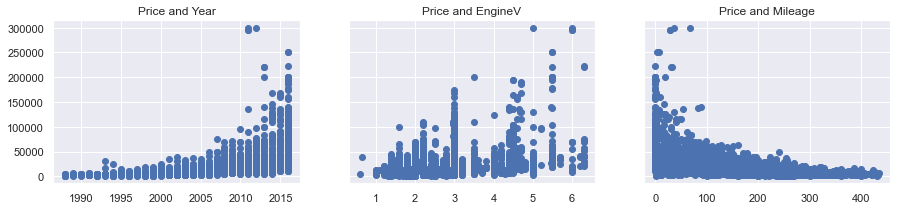

In [21]:
f, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey= True, figsize= (15,3))
ax1.scatter(data_clean['Year'],data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'],data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['Price'])
ax3.set_title('Price and Mileage')
plt.show()

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

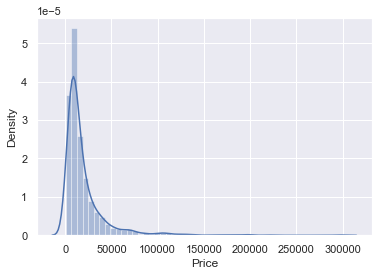

In [22]:
sns.distplot(data_clean['Price'])

### Relaxing the Assumption

In [23]:
log_price = np.log(data_clean['Price'])
data_clean['Log Price'] = log_price
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3903,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3904,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3905,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3906,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


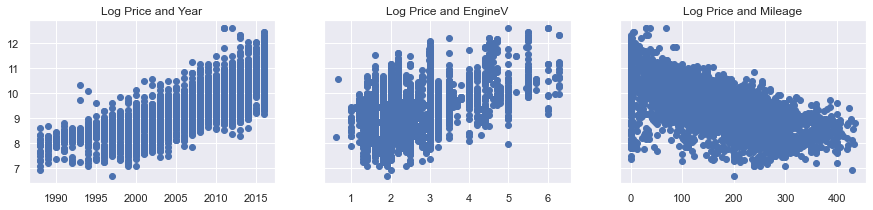

In [24]:
f, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey= True, figsize= (15,3))
ax1.scatter(data_clean['Year'],data_clean['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_clean['EngineV'],data_clean['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['Log Price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [25]:
data_clean = data_clean.drop(['Price'],axis=1)

### Multicollinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_clean[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(var.values,i) for i in range(var.shape[1])]
vif['features'] = var.columns
vif

,VIF,features
0,3.700541,Mileage
1,10.317095,Year
2,7.401772,EngineV


In [27]:
data_no_multicollinearity = data_clean.drop(['Year'],axis=1)

## Create Dummy Variable

In [28]:
data_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_dummies.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearange

In [29]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [30]:
col = ['Log Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [31]:
data_preprocessed = data_dummies[col]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare input and target

In [32]:
target = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'],axis = 1)

### Scaling Data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [34]:
input_scaled = scaler.transform(inputs)

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(input_scaled, target, test_size = 0.2, random_state=365)

### Create Regression

In [39]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [40]:
yhat = reg.predict(x_train)

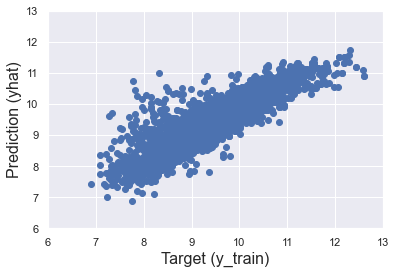

In [42]:
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',size=16)
plt.ylabel('Prediction (yhat)',size=16)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Hasbi Maajid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

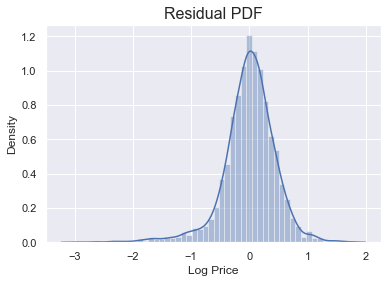

In [43]:
sns.distplot(y_train - yhat)
plt.title("Residual PDF",size = 16)

In [44]:
reg.score(x_train,y_train)

0.7525959626306153

### Finding Weight and Bias

In [45]:
reg.intercept_

9.439335081336479

In [46]:
reg.coef_

array([-0.47574079,  0.25407   ,  0.02061931,  0.02985439, -0.133047  ,
       -0.16786884, -0.05284677, -0.07626141, -0.13728287, -0.09274146,
       -0.19164293, -0.11029495, -0.15924995, -0.12143158, -0.02965608,
       -0.1386294 ,  0.31472585])

In [47]:
reg.summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg.summary['Weight'] = reg.coef_
reg.summary

,Features,Weight
0,Mileage,-0.475741
1,EngineV,0.254070
2,Brand_BMW,0.020619
3,Brand_Mercedes-Benz,0.029854
4,Brand_Mitsubishi,-0.133047
5,Brand_Renault,-0.167869
6,Brand_Toyota,-0.052847
7,Brand_Volkswagen,-0.076261
8,Body_hatch,-0.137283
9,Body_other,-0.092741


## Testing

In [48]:
yhat_test = reg.predict(x_test)

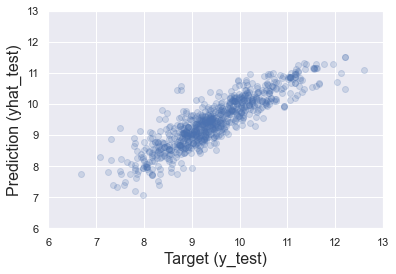

In [50]:
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Target (y_test)',size=16)
plt.ylabel('Prediction (yhat_test)',size=16)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
df_performance = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,2498.373911
1,7470.900575
2,13704.940525
3,7552.986953
4,16387.707226


In [53]:
df_performance['Target']= np.exp(y_test)
df_performance

,Prediction,Target
0,2498.373911,NaN
1,7470.900575,7900.0
2,13704.940525,NaN
3,7552.986953,NaN
4,16387.707226,NaN
...,...,...
777,3215.300116,NaN
778,22295.488898,NaN
779,7762.537064,NaN
780,6947.043646,NaN


In [54]:
y_test = y_test.reset_index(drop=True)
y_test

0      7.495542
1      9.287301
2      9.609116
3      9.305651
4      9.740910
         ...   
777    8.055158
778    9.968104
779    9.510445
780    8.732305
781    9.495519
Name: Log Price, Length: 782, dtype: float64

In [55]:
df_performance['Target']= np.exp(y_test)
df_performance

,Prediction,Target
0,2498.373911,1800.0
1,7470.900575,10800.0
2,13704.940525,14900.0
3,7552.986953,11000.0
4,16387.707226,16999.0
...,...,...
777,3215.300116,3150.0
778,22295.488898,21335.0
779,7762.537064,13500.0
780,6947.043646,6200.0


In [56]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

In [58]:
df_performance['Differences%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)
df_performance

,Prediction,Target,Residual,Differences%
0,2498.373911,1800.0,-698.373911,38.798551
1,7470.900575,10800.0,3329.099425,30.824995
2,13704.940525,14900.0,1195.059475,8.020533
3,7552.986953,11000.0,3447.013047,31.336482
4,16387.707226,16999.0,611.292774,3.596051
...,...,...,...,...
777,3215.300116,3150.0,-65.300116,2.073020
778,22295.488898,21335.0,-960.488898,4.501940
779,7762.537064,13500.0,5737.462936,42.499725
780,6947.043646,6200.0,-747.043646,12.049091


In [59]:
df_performance.describe()

,Prediction,Target,Residual,Differences%
count,782.000000,782.000000,782.000000,782.000000
mean,17240.543316,20244.294348,3003.751032,35.275155
std,15375.969619,26519.607097,16610.795627,47.629622
min,1178.895558,800.000000,-32573.140552,0.116391
25%,7180.006622,6999.000000,-2126.863767,11.044333
50%,11951.216755,11600.000000,303.767064,24.782234
75%,22421.395880,22675.000000,3575.131844,41.194215
max,99808.451254,295000.000000,228688.093659,501.125239


In [61]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x : '%.2f' % x)
df_performance.sort_values(by=['Differences%'])

,Prediction,Target,Residual,Differences%
701,5956.93,5950.00,-6.93,0.12
54,32337.34,32400.00,62.66,0.19
675,7916.09,7900.00,-16.09,0.20
345,39882.23,39999.00,116.77,0.29
720,6733.37,6700.00,-33.37,0.50
762,6666.00,6700.00,34.00,0.51
270,18822.92,18999.00,176.08,0.93
497,8270.33,8350.00,79.67,0.95
5,8810.62,8900.00,89.38,1.00
319,8287.95,8200.00,-87.95,1.07
